In [2]:
# Load libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [9]:
def get_data():
    """
    Return boston dataset
    as x - predictor and
    y - response variable
    """
    data = load_boston()
    x = data['data']
    y = data['target']
    return x, y

def build_models(x, y):
    """
    Build a Lasso regression model
    """
    # Alpha values uniformly
    # spaced between 0.01 and 0.02
    alpha_range = np.linspace(0, 0.5, 200)
    model = Lasso(normalize=True)
    coeffiecients = []
    
    #Fit a model for each alpha value
    for alpha in alpha_range:
        model.set_params(alpha=alpha)
        model.fit(x, y)
        #Track the coeffiecients for plot
        coeffiecients.append(model.coef_)
    
    #Plot coeffiecients weight decay vs alpha value
    #Plot model RMSE vs alpha value
    coeff_path(alpha_range, coeffiecients)
    #View coeffiecient value
    #view_model(model)
    
def view_model(model):
    """
    Look at model coeffiecients
    """
    print("\n Model coeffiecients")
    print("======================")
    for i, coef in enumerate(model.coef_):
        print("\tCoefficient %d %0.3f"%(i+1, coef))
    print("\n\tIntercept %0.3f"%(model.intercept_))
    
def model_worth(true_y, predicted_y):
    """
    Evaluate the model
    """
    print("\tMean squared error = %0.2f\n"%(mean_squared_error(true_y, predicted_y)))
    

In [10]:
def coeff_path(alpha_range, coeffiecients):
    """
    Plot residuals
    """
    plt.close('all')
    plt.cla()
    
    plt.figure(1)
    plt.xlabel("Alpha Values")
    plt.ylabel("Coeffiecient Weight")
    plt.title("Coeffiecient weights for different alpha values")
    plt.plot(alpha_range, coeffiecients)
    plt.axis('tight')
    plt.show()
    
def get_coeff(x, y, alpha):
    model = Lasso(normalize=True, alpha=alpha)
    model.fit(x, y)
    coefs = model.coef_
    indices = [i for i, coef in enumerate(coefs) if abs(coef) > 0.0]
    return indices

/root/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

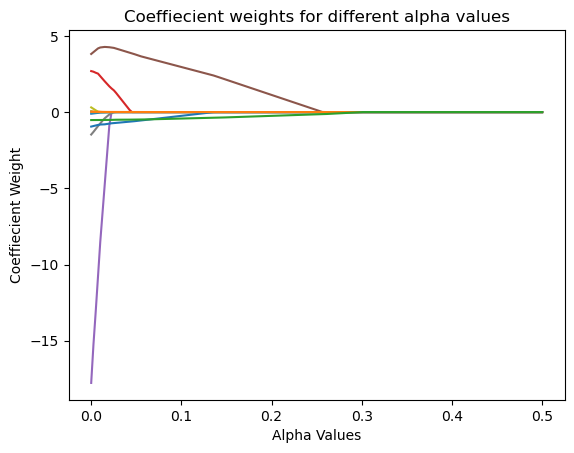


Predicting using all the variables
	Mean squared error = 21.89


Models at different alpha values

	 alpha = 0.22 Number of variables selected = 2 
	 attributes include [5, 12]
	Mean squared error = 30.51

	 alpha = 0.08 Number of variables selected = 3 
	 attributes include [5, 10, 12]
	Mean squared error = 27.13

	 alpha = 0.01 Number of variables selected = 9 
	 attributes include [0, 1, 3, 4, 5, 7, 10, 11, 12]
	Mean squared error = 22.89



/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/root/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model

In [11]:
if __name__ == "__main__":
    x, y = get_data()
    #Build multiple models for different alpha values
    #and plot them
    build_models(x, y)
    print("\nPredicting using all the variables")
    full_model = LinearRegression(normalize=True)
    full_model.fit(x, y)
    predicted_y = full_model.predict(x)
    model_worth(y, predicted_y)
    
    print("\nModels at different alpha values\n")
    alpha_values = [0.22, 0.08, 0.01]
    for alpha in alpha_values:
        indices = get_coeff(x, y, alpha)
        print("\t alpha = %0.2f Number of variables selected = %d "%(alpha, len(indices)))
        print("\t attributes include", indices)
        x_new = x[:, indices]
        model = LinearRegression(normalize=True)
        model.fit(x_new, y)
        predicted_y = model.predict(x_new)
        model_worth(y, predicted_y)